In [89]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import seaborn as sns
from nltk.stem import wordnet

In [2]:
df = pd.read_csv('Job Descriptions.csv', encoding='cp1252')

In [3]:
df

,Sl. No,Job Role,Company,Job Description,Source
0,1,Quant Analytics Associate,JPMorgan Chase & Co,"Design, develop, and maintain customer dashboa...",LinkedIn
1,2,Data Analyst,Gojek,At least a Bachelor’s degree\nHave at least 3 ...,LinkedIn
2,3,Associate - Analytics,Genpact,Hands of experience with Data processes like R...,LinkedIn
3,4,Data Analyst - 2,PayPal,Using modeling and analytics to understand how...,LinkedIn
4,5,Data Analyst I,Cerner Corporation,Leverage business data and statistical methods...,LinkedIn
5,6,Data Scientist,Tesco Bengaluru,An intermediate knowledge level of the Data Sc...,LinkedIn
6,7,Data Science Specialist,GE Aviation,The Data Science Specialist will be a part of ...,LinkedIn
7,8,Analyst-DTI-FS Tech- Campus,KPMG,"Attitude, eagerness to learn, contribute and p...",LinkedIn
8,9,Data Analyst,Stanza Living,You will work closely with business managers a...,LinkedIn
9,10,Data Analytics,BorgWarner,Support Engineering Excellence team in Systems...,LinkedIn


In [4]:
def clean_text(sentence):
    return re.sub('[^A-Z]', ' ', sentence.strip().upper()).strip()

In [5]:
def word_tokenize(sentence):
    return sentence.split(' ')

In [6]:
def generate_wordcount(sentence):
    wordcount = {}
    for word in sentence:
        if word not in wordcount.keys():
            wordcount[word] = 1
        else:
            wordcount[word] += 1
    return wordcount

In [7]:
word_tokenized_sentences = []
for sentence in df['Job Description']:
    word_tokenized_sentences.extend(word_tokenize(clean_text(sentence)))

In [8]:
lemmatizer = WordNetLemmatizer()
word_tokenized_sentences = list(map(lemmatizer.lemmatize, word_tokenized_sentences))

In [ ]:
stopwords = ['ANALYZE','ANALYTICS','VIDEOS','READING','']

In [62]:
custom_stopwords = set(map(lambda x: x.upper(), stopwords.words('english')))
custom_stopwords = list(custom_stopwords) + [
    'SOLUTIONS', 'WORK', 'EXPERIENCE', 'SKILLS', 'TEAM', 'JOB', 'TOOLS', 'USING', 'TEAMS',
    'EXCELLENT','ONE','UNDERSTANDING','PROCESS','ONE','DIFFERENT','UNDERSTAND','CLOSELY',
    'MAINTAIN','TIME','ENSURES','DEEP','','ABLE','REQUIRED','BASED','SOLVE','YEARS','DEGREE',
    'IDENTIFY','BUILD','SOLUTION','STRONG','APPLIED','MAKING','LEAD','DESIGN','PROBLEM','LARGE',
    'DRIVE','NEW', 'BUILDING','WELL','LANGUAGE','INSIGHTS','TRANSLATE','DECISION','PROJECTS',
    'STAKEHOLDERS','REPORTING','DEVELOPING','APPLICATION','VARIOUS','IMPROVE','PLUS','IMPACT',
    'QUALITY','DELIVER','WRITTEN','INCLUDING','GOOD','PRACTICES','RESULTS','CREATE','TESTING',
    'MAKE','ACROSS','LEARN','END','SERVICES','WORKING','SYSTEMS','METHODS','PROVIDE','PRODUCTS',
    'WITHIN','ENVIRONMENT','HELP','MAY','ISSUES','PART','USE','INDENTIFYING','BIG','HIGH','RECOMMENDATIONS',
    'SOURCES','SOLVING','NEED','PROFICIENCY','METRICS','MULTIPLE','COLLABORATE','HANDS','BEST','KEY',
    'OPPORTUNITIES','NON','SETS','AGILE','SUPERVISION','DEVELOP','COMPLEX','VERBAL','PROCESSES','PERFORMANCE',
    'LANGUAGES','MUST','MASTER','PRESENT','ANALYSIS','ETC','QUALIFICATIONS','QUANTITATIVE','STRATEGIC','PRODUCT',
    'TECHNOLOGY','TECHNIQUES','SOFTWARE','LEAST','RESPONSIBLE','MODELS','EXPERTISE','E','CREATING','BACHELOR',
    'NEEDED','WRITE','CLOUD','MANAGE','IMPLEMENTATION','ABILITY','POLICIES','TECHNICAL','AREA','SYSTEM','KNOWLEDGE',
    'TEST','INDUSTRY','RANGE','SENIOR','PROBLEMS','DEPLOYING','OUTCOMES','CLIENTS','SUPPORT','LIKE','SELF',
    'INDEPENDENTLY','USER','EQUIVALENT','CONTENT','WIDE','OBJECTIVES','DEVELOPMENT','RELATED','GREAT','LIBRARIES',
    'IDENTIFYING','DECISIONS','CONTRIBUTE','LEVEL','CREATIVE','COMPANY','LEARNING','GOALS','FIELDS','INTERPRET',
    'MEMBERS','TOOL','FAMILIARITY','ROLE','PROGRAMMING','INFORMATION','RESPONSIBILITIES','INTERNAL','ORIENTED',
    'AD','ALSO','ORDER','DEFINE','ORIENTATION','STRUCTURED','PROCESSING','VARIETY','CLOSE','CLEAR','ORDER',
    'EVALUATE','CHALLENGES','LOOKING','NEEDS','CUSTOMERS','APROACHES','CONCEPTS','REPORTS','STRATEGIES',
    'UNSTRUCTURED','COLLABORATING','ANALYSES','INNOVATIVE','EFFORTS','OTHERS','DEADLINES','PLANNING',
    'TECHNOLOGIES','FUNCTIONAL','ENSURING','DEFINING','LOGICAL','CLIENT','DIVERSE','INFLUENCE','ENGINEERS',
    'THINKING','FEATURES','SET','PARTNERS','NATURAL','BANK','APPROACHES','STANDARD','INFLUENCE','MULTI',
    'SHARE','TOWARDS','SUCCESS','QUESTIONS','TRAINING','DEVELOPERS','GATHER','OPERATIONAL','ACCURACY',
    'RESCIND','FLEXIBILITY','BENEFITS','STUDIES','TIMELY','LEARNER','ADOPT','VARY','DATA','BUSINESS',
    'UNDERGRADUATE','DISCUSSIONS','SESSIONS','EMPLOYMENT','CONTRACT','ENGAGING','CASE','ALGORITHMS',
    'DIRECTIVES','FEEDBACK','RESPONSE','FAMILIAR','OPEN','INCLUDE','TOWARDS','QUERIES','TRACK','USERS','WORLD',
    'DOCUMENT','TRENDS','VALIDATE','FRAMEWORKS','PROVEN','WRITING','DEMONSTRATE','TREES','CASES',
    'USED','DRIVEN','RELEVANT','PROFICIENT','SPACE','PERFORM','SALES','VALIDATING','ADDITIONAL',
    'COMPONENTS','INTERPERSONAL','IMPLEMENTING','DEMONSTRATED','AMOUNTS','COLLABORATION','DIRECTION','ACTIVITIES',
    'SIMILAR','USES','MONITOR','GROUP','ORAL','INITIATIVES',
    'DIRECTLY','METRIC','AUTOMATED','IMPLEMENT','GROWTH','FIRM','STATE','DISCIPLINE','APPROACH','CONTEXT',
    'STATE','VALIDATION','FEASIBILITY','COMMON','COULD','IMPOVEMENT','SOURCE','POWER','GAIN','DAILY','EXTRACTING',
    'REQUIREMENT','DOMAINS','ROUTINE','PROFESSIONAL','GATHERING_REQUIREMENTS','BUSINESS_MINE','FINE_TUNE',
    'SELECTING_OPTIMIZING','UNIQUE_EXPERIENCES','CHANGING_BUSINESS','DATABASE_DATA','EXTERNAL_DATA',
    'BUSINESS_BUSINESS','LIFECYCLE_DATA','DATA_DATA','DATA_FORM','DATA_DRAW','ATTENTION_DETAIL',
    'FAST_PACED','DATA_DATABASES','ROOT_CAUSE','DISTRIBUTIONS_STATISTICAL','EVERY_YEAR','DATA_DATA_MINING',
    'REQUESTS_ASSISTANCE_WORKS','CHANGES_PROJECT_REPORT','PERIMETER_ANTICIPATE_ACCOMPANY','OWNER_IMPACTS_BUSINESS',
    'ASSISTANCE_WORKS_EXCLUSIVELY','DIRECTIVES_ABSOLUTE_DISCRETION','FACTS_INVESTIGATES_REQUESTS',
    'LIMITATION_IMPLIED_OTHERWISE','STATISTICS_DISTRIBUTIONS_STATISTICAL','SPECIFICITIES_SPECIFIED_INTERVIEW',
    'TOPICS_COMPLY_TERMS','EXPLANATIONS_TOPICS_COMPLY','PRIORITIZES_ORGANIZES_MEET','MEET_PROVIDES_EXPLANATIONS',
    'COMPLY_TERMS_CONDITIONS','PROJECT_PERIMETER_ANTICIPATE','DIRECTIVES_LIMITED_TRANSFER',
    'SHIFTS_REGARDS_FLEXIBILITY','ASSIGNMENT_LOCATIONS_CHANGE','ESTIMATE_PROJECT_PERIMETER',
    'REPORT_REGULAR_COMMUNICATION','SCIENCE_COMPUTER_SCIENCE','IMPACTS_BUSINESS_REQUIREMENTS',
    'LIMITED_TRANSFER_ASSIGNMENT','SPECIFIC_PRIORIIZES_ORGANIZES','CHALLENGE_OWNER_IMPACTS',
    'REGARDS_FLEXIBILTY_BENEFITS','PROCEDURES_DIRECTIVES_LIMITED','WITHOUT_LIMITATION_IMPLIED',
    'PROGRAMS_INTERNATIONAL_MARKETS','BENEFITS_ALTERNATIVE_ARRANGEMENTS','PROVIDES_EXPLANATIONS_TOPICS',
    'EXCLUSIVELY_SPECIFIC_PRIORITIZES','TERMS_APPROPRIATENESS_RICHNESS','ABSOLUTE_DISCRETION_WITHOUT',
    'ADOPT_VARY_RESCIND','TRANSFER_ASSIGNMENT_LOCATIONS','RICHNESS_UPDATING_VIDEOS',
    'LOCATIONS_CHANGE_SHIFTS','ACADEMIC_LEARNERS_UNIQUE','ARRANGEMENTS_ARISE_DUE','LEARNERS_TIMELY_RESPONSE',
    'WORKS_EXCLUSIVELY_SPECIFIC','ACCOMPANY_CHANGES_PROJECT','ONGOING_REVIEW_TERMS','DUE_CHANGING_BUSINESS',
    'INVESTIGATES_REQUESTS_ASSISTANCE','TERMS_CONDITIONS_EMPLOYMENT','DATA_ANSWER_BUSINESS',
    'REVIEW_TERMS_APPROPRIATENESS','UPDATING_VIDEOS_READING','ALTERNATIVE_ARRANGEMENTS_ARISE',
    'ANALYZE_CHALLENGE_OWNER','IMPORTANT_ASPECT_PICK','SPECIFIC_PRIORITIZES_ORGANIZES',
    'LEARNER_TIMELY_RESPONSE','ENSURE_ONGOING_REVIEW','MATERIAL_EXCERICES_ASSIGNMENTS',
    'PICK_BUSINESS_FUNCTIONS','IMPLIED','OTHERWISE','MEET','PROVIDES','ORGANIZES','PANEL',
    'INTERNATIONAL','ARISE','CHANGING','APPROPRIATENESS','ENABLE','DELIGHTFUL','LIMITATION',
    'WITHOUT','PERFORM','PROCEDURES','LIMITED','TRANSFER','MEANINGFUL','DELIGHTFUL','RICHNESS','UPDATING',
    'ANALYTICAL_PUZZLES','CHALLLENGE_OWNER','OWNER_IMPACTS','MINE_ANALYZE','TERMS_CONDITIONS',
    'ABSOLUTE_DISCRETION','CHAIN_ENGINE','PRIORITIZES_EXPLANATIONS','TOPICS_COMPLY','PERIMETER_ESTIMATE',
    'PROJECT_PERIMETER','FACTS_INVESTGATES','CHANGES_PROJECT','INVESTIGATES_REQUESTS','ARRANGEMENTS_DUE',
    'LOCATIONS_CHANGE','REGULAR_COMMUNICATIONS','PRIORITIZES','EXPLANATIONS','SPECIFICITIES_SPECIFIED',
    'PROJECT','ESTIMATE','THINK_STRATEGICALLY','FACTS_INVESTIGATES','IMPACTS_REQUIREMENTS',
    'DISCRETION','REPORT','REGULAR','ACCOMPANY','CHANGES','PERIMETER','ANTICIPATE','PROGRAMS',
    'SHIFTS','REGARDS','AREAS','EXTERNAL','PATTERNS','PROMOTE','SIGNIFICANT','SCRIPTING','TERMS_VIDEOS',
    'CHANGE_ALTERNATIVE','COMPLY_TERMS','ASSIGNMENT_LOCATIONS','REQUESTS_ASSISTANCE','REQUIREMENTS_STORIES',
    'MARKETS_ENSURE','PERTINENT_FACTS','CHALLENGE_OWNER','MATERIAL_EXCERCISES','SPECIFIED_INTERVIEW',
    'ALTERNATIVE_ARRANGEMENTS','EXCERCISES_ASSIGNMENTS','CONDITIONS_ASSIGNMENT','WORKS_EXCLUSIVELY',
    'ANSWER','ABSOLUTE','READING_MATERIAL','ASPECT_PICK','PICK_FUNCTIONS','ASSIGNMENTS_SMES',
    'DUE_ABSOLUTE','CONFERENCES'
]

In [63]:
word_tokenized_sentences = list(filter(
    lambda x: True if x not in custom_stopwords else False,
    word_tokenized_sentences
))
word_tokenized_sentences

['CUSTOMER',
 'DASHBOARDS',
 'VISUALIZATION',
 'TABLEAU',
 'ANALYZE',
 'TABLEAU',
 'DASHBOARDS',
 'INTERACTIVE',
 'ANALYTIC',
 'SUITES',
 'ACTIONABLE',
 'COMPARATIVE',
 'EFFECTIVENESS',
 'BANKING',
 'PACKAGE',
 'EXECUTIVE',
 'VISUALIZED',
 'FORMAT',
 'PREPARE',
 'AUTOMATE',
 'TABLEAU',
 'DASHBOARDS',
 'STATISTICALLY',
 'DERIVED',
 'BENCHMARKS',
 'ANALYTIC',
 'TABLEAU',
 'ALTERYX',
 'SAS',
 'SQL',
 'EXCEL',
 'PRO',
 'ACTIVELY',
 'COMMUNICATE',
 'LEADERSHIP',
 'FINE',
 'TUNE',
 'CROSS',
 'STRATEGY',
 'CUSTOMIZED',
 'ROADMAPS',
 'SYNTHESIZE',
 'ACTIONABLE',
 'INTELLIGENCE',
 'ANALYTICS',
 'EXPERT',
 'SQL',
 'INTERMEDIATE',
 'R',
 'PYTHON',
 'WAY',
 'ETL',
 'COMFORTABLE',
 'MINIMAL',
 'GUIDANCE',
 'SETTING',
 'CRITICAL',
 'TASKS',
 'GOAL',
 'MDM',
 'MATCHING',
 'QUERYING',
 'CRM',
 'UPDATES',
 'CUSTOMER',
 'MANAGEMENT',
 'PHARMA',
 'COMMERCIAL',
 'DDD',
 'NPA',
 'NSP',
 'RX',
 'CALL',
 'ACTIVITY',
 'VEEVA',
 'ADVANTAGE',
 'SQL',
 'R',
 'PYTHON',
 'VISUALIZATION',
 'TABLEAU',
 'BI',
 'ANALY

In [64]:
wordcount = generate_wordcount(word_tokenized_sentences)
wordcount

{'CUSTOMER': 10,
 'DASHBOARDS': 8,
 'VISUALIZATION': 7,
 'TABLEAU': 10,
 'ANALYZE': 18,
 'INTERACTIVE': 2,
 'ANALYTIC': 5,
 'SUITES': 1,
 'ACTIONABLE': 3,
 'COMPARATIVE': 1,
 'EFFECTIVENESS': 1,
 'BANKING': 3,
 'PACKAGE': 1,
 'EXECUTIVE': 2,
 'VISUALIZED': 1,
 'FORMAT': 1,
 'PREPARE': 1,
 'AUTOMATE': 4,
 'STATISTICALLY': 1,
 'DERIVED': 3,
 'BENCHMARKS': 3,
 'ALTERYX': 1,
 'SAS': 3,
 'SQL': 19,
 'EXCEL': 6,
 'PRO': 1,
 'ACTIVELY': 2,
 'COMMUNICATE': 11,
 'LEADERSHIP': 4,
 'FINE': 3,
 'TUNE': 2,
 'CROSS': 3,
 'STRATEGY': 1,
 'CUSTOMIZED': 1,
 'ROADMAPS': 1,
 'SYNTHESIZE': 2,
 'INTELLIGENCE': 12,
 'ANALYTICS': 46,
 'EXPERT': 3,
 'INTERMEDIATE': 2,
 'R': 10,
 'PYTHON': 31,
 'WAY': 3,
 'ETL': 6,
 'COMFORTABLE': 1,
 'MINIMAL': 3,
 'GUIDANCE': 2,
 'SETTING': 2,
 'CRITICAL': 3,
 'TASKS': 4,
 'GOAL': 3,
 'MDM': 1,
 'MATCHING': 1,
 'QUERYING': 2,
 'CRM': 1,
 'UPDATES': 1,
 'MANAGEMENT': 13,
 'PHARMA': 1,
 'COMMERCIAL': 4,
 'DDD': 1,
 'NPA': 1,
 'NSP': 1,
 'RX': 1,
 'CALL': 2,
 'ACTIVITY': 1,
 'V

In [65]:
wordcount_df = pd.DataFrame([wordcount]).T.reset_index()
wordcount_df.columns = ['Word', 'Frequency']
wordcount_df.sort_values(by=['Frequency'], ascending=False)

,Word,Frequency
37,ANALYTICS,46
89,MACHINE,42
126,SCIENCE,39
235,ML,36
41,PYTHON,31
...,...,...
646,CIRCUMSTANCES,1
647,GENERALLY,1
648,NATURE,1
649,TROUBLESHOOTING,1


In [66]:
wordcount_df['Frequency'].describe()

count    1454.000000
mean        2.079092
std         3.113577
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        46.000000
Name: Frequency, dtype: float64

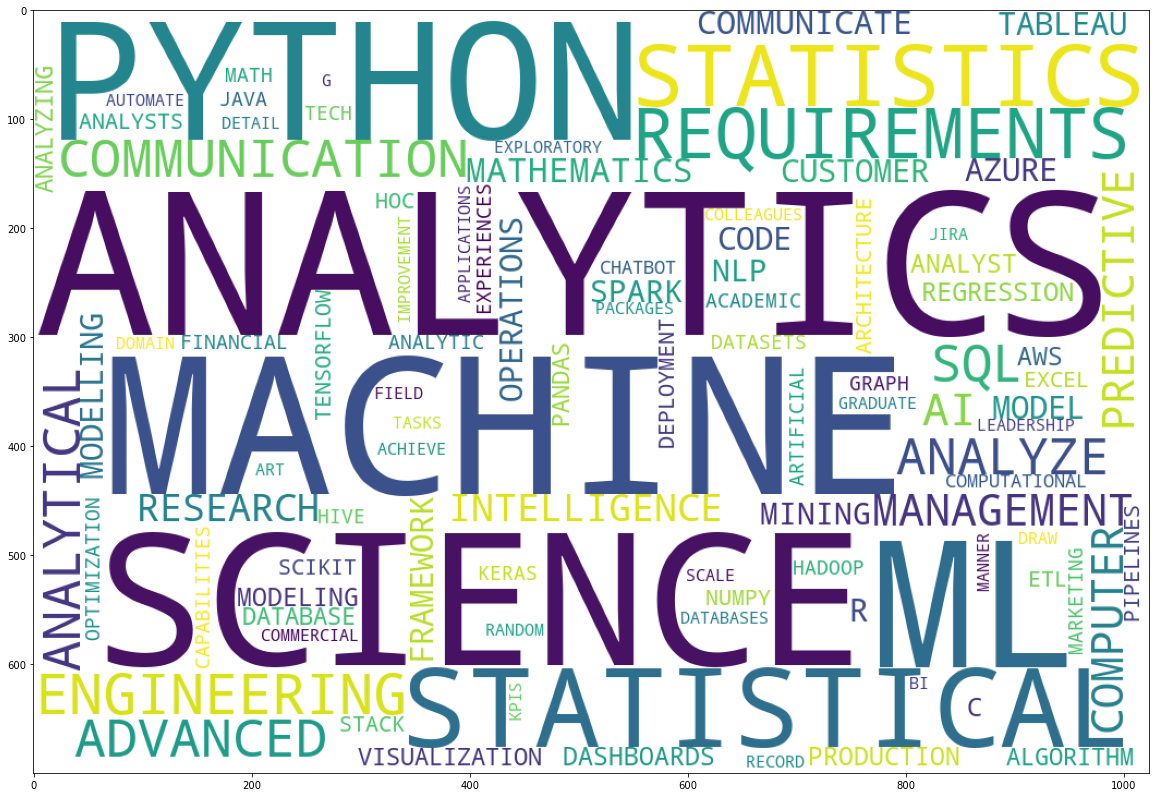

In [67]:
wordcloud = WordCloud(
    width=1024,
    height=700,
    background_color='White',
    max_words=100,
    random_state=10,
    min_word_length=2
)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud.generate_from_frequencies(wordcount))
plt.show()

In [68]:
bigrams = list(nltk.bigrams(word_tokenized_sentences))
bigrams
print(bigrams)
dictionary2 = ['_'.join(tup) for tup in bigrams]
print (dictionary2)

[('CUSTOMER', 'DASHBOARDS'), ('DASHBOARDS', 'VISUALIZATION'), ('VISUALIZATION', 'TABLEAU'), ('TABLEAU', 'ANALYZE'), ('ANALYZE', 'TABLEAU'), ('TABLEAU', 'DASHBOARDS'), ('DASHBOARDS', 'INTERACTIVE'), ('INTERACTIVE', 'ANALYTIC'), ('ANALYTIC', 'SUITES'), ('SUITES', 'ACTIONABLE'), ('ACTIONABLE', 'COMPARATIVE'), ('COMPARATIVE', 'EFFECTIVENESS'), ('EFFECTIVENESS', 'BANKING'), ('BANKING', 'PACKAGE'), ('PACKAGE', 'EXECUTIVE'), ('EXECUTIVE', 'VISUALIZED'), ('VISUALIZED', 'FORMAT'), ('FORMAT', 'PREPARE'), ('PREPARE', 'AUTOMATE'), ('AUTOMATE', 'TABLEAU'), ('TABLEAU', 'DASHBOARDS'), ('DASHBOARDS', 'STATISTICALLY'), ('STATISTICALLY', 'DERIVED'), ('DERIVED', 'BENCHMARKS'), ('BENCHMARKS', 'ANALYTIC'), ('ANALYTIC', 'TABLEAU'), ('TABLEAU', 'ALTERYX'), ('ALTERYX', 'SAS'), ('SAS', 'SQL'), ('SQL', 'EXCEL'), ('EXCEL', 'PRO'), ('PRO', 'ACTIVELY'), ('ACTIVELY', 'COMMUNICATE'), ('COMMUNICATE', 'LEADERSHIP'), ('LEADERSHIP', 'FINE'), ('FINE', 'TUNE'), ('TUNE', 'CROSS'), ('CROSS', 'STRATEGY'), ('STRATEGY', 'CUSTO

In [69]:
dictionary2 = list(filter(
    lambda x: True if x not in custom_stopwords else False,
    dictionary2
))
dictionary2

['CUSTOMER_DASHBOARDS',
 'DASHBOARDS_VISUALIZATION',
 'VISUALIZATION_TABLEAU',
 'TABLEAU_ANALYZE',
 'ANALYZE_TABLEAU',
 'TABLEAU_DASHBOARDS',
 'DASHBOARDS_INTERACTIVE',
 'INTERACTIVE_ANALYTIC',
 'ANALYTIC_SUITES',
 'SUITES_ACTIONABLE',
 'ACTIONABLE_COMPARATIVE',
 'COMPARATIVE_EFFECTIVENESS',
 'EFFECTIVENESS_BANKING',
 'BANKING_PACKAGE',
 'PACKAGE_EXECUTIVE',
 'EXECUTIVE_VISUALIZED',
 'VISUALIZED_FORMAT',
 'FORMAT_PREPARE',
 'PREPARE_AUTOMATE',
 'AUTOMATE_TABLEAU',
 'TABLEAU_DASHBOARDS',
 'DASHBOARDS_STATISTICALLY',
 'STATISTICALLY_DERIVED',
 'DERIVED_BENCHMARKS',
 'BENCHMARKS_ANALYTIC',
 'ANALYTIC_TABLEAU',
 'TABLEAU_ALTERYX',
 'ALTERYX_SAS',
 'SAS_SQL',
 'SQL_EXCEL',
 'EXCEL_PRO',
 'PRO_ACTIVELY',
 'ACTIVELY_COMMUNICATE',
 'COMMUNICATE_LEADERSHIP',
 'LEADERSHIP_FINE',
 'TUNE_CROSS',
 'CROSS_STRATEGY',
 'STRATEGY_CUSTOMIZED',
 'CUSTOMIZED_ROADMAPS',
 'ROADMAPS_SYNTHESIZE',
 'SYNTHESIZE_ACTIONABLE',
 'ACTIONABLE_INTELLIGENCE',
 'INTELLIGENCE_ANALYTICS',
 'ANALYTICS_EXPERT',
 'EXPERT_SQL

In [70]:
bigram_wordcount = generate_wordcount(dictionary2)
bigram_wordcount

{'CUSTOMER_DASHBOARDS': 1,
 'DASHBOARDS_VISUALIZATION': 1,
 'VISUALIZATION_TABLEAU': 2,
 'TABLEAU_ANALYZE': 1,
 'ANALYZE_TABLEAU': 1,
 'TABLEAU_DASHBOARDS': 2,
 'DASHBOARDS_INTERACTIVE': 1,
 'INTERACTIVE_ANALYTIC': 1,
 'ANALYTIC_SUITES': 1,
 'SUITES_ACTIONABLE': 1,
 'ACTIONABLE_COMPARATIVE': 1,
 'COMPARATIVE_EFFECTIVENESS': 1,
 'EFFECTIVENESS_BANKING': 1,
 'BANKING_PACKAGE': 1,
 'PACKAGE_EXECUTIVE': 1,
 'EXECUTIVE_VISUALIZED': 1,
 'VISUALIZED_FORMAT': 1,
 'FORMAT_PREPARE': 1,
 'PREPARE_AUTOMATE': 1,
 'AUTOMATE_TABLEAU': 1,
 'DASHBOARDS_STATISTICALLY': 1,
 'STATISTICALLY_DERIVED': 1,
 'DERIVED_BENCHMARKS': 1,
 'BENCHMARKS_ANALYTIC': 1,
 'ANALYTIC_TABLEAU': 1,
 'TABLEAU_ALTERYX': 1,
 'ALTERYX_SAS': 1,
 'SAS_SQL': 1,
 'SQL_EXCEL': 1,
 'EXCEL_PRO': 1,
 'PRO_ACTIVELY': 1,
 'ACTIVELY_COMMUNICATE': 1,
 'COMMUNICATE_LEADERSHIP': 1,
 'LEADERSHIP_FINE': 1,
 'TUNE_CROSS': 1,
 'CROSS_STRATEGY': 1,
 'STRATEGY_CUSTOMIZED': 1,
 'CUSTOMIZED_ROADMAPS': 1,
 'ROADMAPS_SYNTHESIZE': 1,
 'SYNTHESIZE_ACTIONA

In [71]:
bigram_wordcount_df = pd.DataFrame([bigram_wordcount]).T.reset_index()
bigram_wordcount_df.columns = ['Word','Frequency']
bigram_wordcount_df.sort_values(by=['Frequency'], ascending=False)

,Word,Frequency
248,COMPUTER_SCIENCE,10
1094,PANDAS_NUMPY,6
321,PYTHON_R,6
480,STATISTICS_MATHEMATICS,6
468,AI_ML,6
...,...,...
921,TROUBLESHOOT_DEAL,1
922,DEAL_NOVEL,1
923,NOVEL_CIRCUMSTANCES,1
924,CIRCUMSTANCES_GENERALLY,1


In [72]:
bigram_wordcount_df['Frequency'].describe()

count    2704.000000
mean        1.086169
std         0.402968
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        10.000000
Name: Frequency, dtype: float64

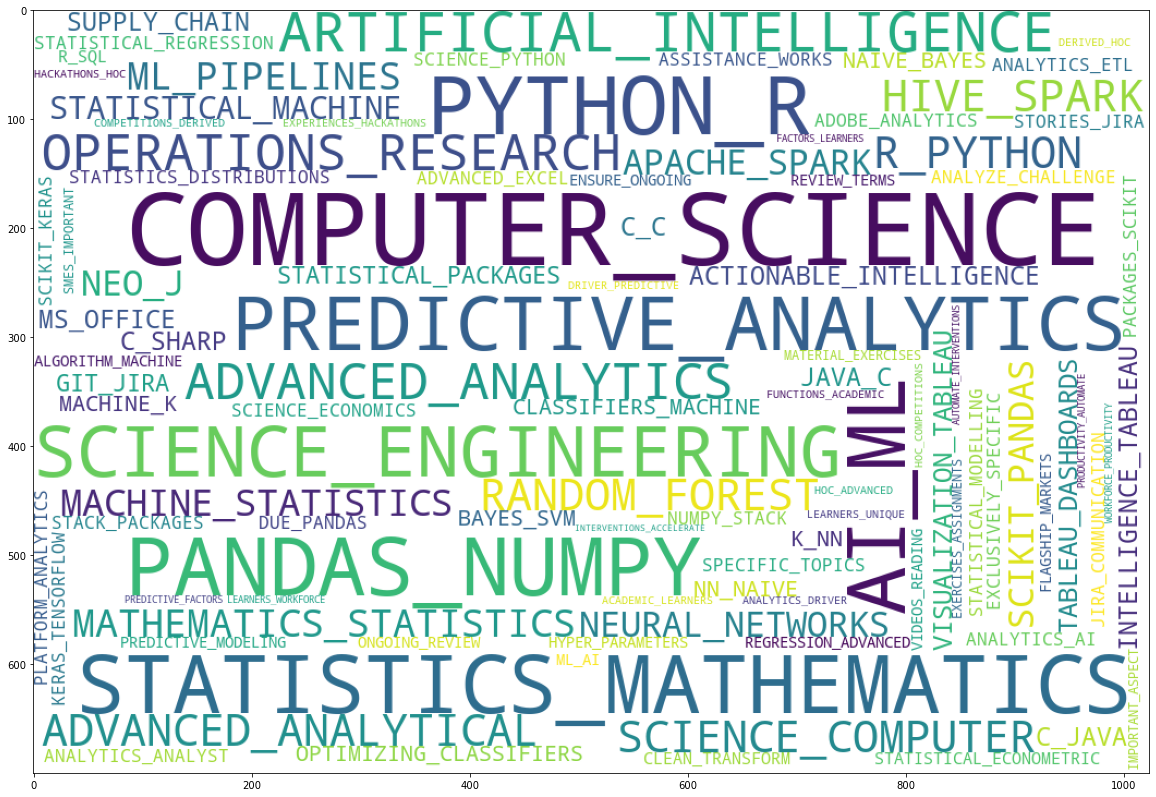

In [73]:
wordcloud = WordCloud(
    collocation_threshold = 2,
    width=1024,
    height=700,
    background_color='White',
    max_words=100,
    random_state=10,
    min_word_length=2
).generate_from_frequencies((bigram_wordcount))
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud)
plt.show()

In [21]:
trigrams = list(nltk.trigrams(word_tokenized_sentences))
trigrams
dictionary3 = ['_'.join(tup) for tup in trigrams]
print (dictionary3)

['CUSTOMER_DASHBOARDS_VISUALIZATION', 'DASHBOARDS_VISUALIZATION_TABLEAU', 'VISUALIZATION_TABLEAU_ANALYZE', 'TABLEAU_ANALYZE_TABLEAU', 'ANALYZE_TABLEAU_DASHBOARDS', 'TABLEAU_DASHBOARDS_INTERACTIVE', 'DASHBOARDS_INTERACTIVE_ANALYTIC', 'INTERACTIVE_ANALYTIC_SUITES', 'ANALYTIC_SUITES_ACTIONABLE', 'SUITES_ACTIONABLE_COMPARATIVE', 'ACTIONABLE_COMPARATIVE_EFFECTIVENESS', 'COMPARATIVE_EFFECTIVENESS_BANKING', 'EFFECTIVENESS_BANKING_PACKAGE', 'BANKING_PACKAGE_EXECUTIVE', 'PACKAGE_EXECUTIVE_VISUALIZED', 'EXECUTIVE_VISUALIZED_FORMAT', 'VISUALIZED_FORMAT_PREPARE', 'FORMAT_PREPARE_AUTOMATE', 'PREPARE_AUTOMATE_TABLEAU', 'AUTOMATE_TABLEAU_DASHBOARDS', 'TABLEAU_DASHBOARDS_STATISTICALLY', 'DASHBOARDS_STATISTICALLY_DERIVED', 'STATISTICALLY_DERIVED_BENCHMARKS', 'DERIVED_BENCHMARKS_ANALYTIC', 'BENCHMARKS_ANALYTIC_TABLEAU', 'ANALYTIC_TABLEAU_ALTERYX', 'TABLEAU_ALTERYX_SAS', 'ALTERYX_SAS_SQL', 'SAS_SQL_EXCEL', 'SQL_EXCEL_PRO', 'EXCEL_PRO_ACTIVELY', 'PRO_ACTIVELY_AREAS', 'ACTIVELY_AREAS_COMMUNICATE', 'AREAS_C

In [22]:
dictionary3 = list(filter(
    lambda x: True if x not in custom_stopwords else False,
    dictionary3
))
dictionary3

['CUSTOMER_DASHBOARDS_VISUALIZATION',
 'DASHBOARDS_VISUALIZATION_TABLEAU',
 'VISUALIZATION_TABLEAU_ANALYZE',
 'TABLEAU_ANALYZE_TABLEAU',
 'ANALYZE_TABLEAU_DASHBOARDS',
 'TABLEAU_DASHBOARDS_INTERACTIVE',
 'DASHBOARDS_INTERACTIVE_ANALYTIC',
 'INTERACTIVE_ANALYTIC_SUITES',
 'ANALYTIC_SUITES_ACTIONABLE',
 'SUITES_ACTIONABLE_COMPARATIVE',
 'ACTIONABLE_COMPARATIVE_EFFECTIVENESS',
 'COMPARATIVE_EFFECTIVENESS_BANKING',
 'EFFECTIVENESS_BANKING_PACKAGE',
 'BANKING_PACKAGE_EXECUTIVE',
 'PACKAGE_EXECUTIVE_VISUALIZED',
 'EXECUTIVE_VISUALIZED_FORMAT',
 'VISUALIZED_FORMAT_PREPARE',
 'FORMAT_PREPARE_AUTOMATE',
 'PREPARE_AUTOMATE_TABLEAU',
 'AUTOMATE_TABLEAU_DASHBOARDS',
 'TABLEAU_DASHBOARDS_STATISTICALLY',
 'DASHBOARDS_STATISTICALLY_DERIVED',
 'STATISTICALLY_DERIVED_BENCHMARKS',
 'DERIVED_BENCHMARKS_ANALYTIC',
 'BENCHMARKS_ANALYTIC_TABLEAU',
 'ANALYTIC_TABLEAU_ALTERYX',
 'TABLEAU_ALTERYX_SAS',
 'ALTERYX_SAS_SQL',
 'SAS_SQL_EXCEL',
 'SQL_EXCEL_PRO',
 'EXCEL_PRO_ACTIVELY',
 'PRO_ACTIVELY_AREAS',
 'ACTIV

In [23]:
trigram_wordcount = generate_wordcount(dictionary3)
trigram_wordcount

{'CUSTOMER_DASHBOARDS_VISUALIZATION': 1,
 'DASHBOARDS_VISUALIZATION_TABLEAU': 1,
 'VISUALIZATION_TABLEAU_ANALYZE': 1,
 'TABLEAU_ANALYZE_TABLEAU': 1,
 'ANALYZE_TABLEAU_DASHBOARDS': 1,
 'TABLEAU_DASHBOARDS_INTERACTIVE': 1,
 'DASHBOARDS_INTERACTIVE_ANALYTIC': 1,
 'INTERACTIVE_ANALYTIC_SUITES': 1,
 'ANALYTIC_SUITES_ACTIONABLE': 1,
 'SUITES_ACTIONABLE_COMPARATIVE': 1,
 'ACTIONABLE_COMPARATIVE_EFFECTIVENESS': 1,
 'COMPARATIVE_EFFECTIVENESS_BANKING': 1,
 'EFFECTIVENESS_BANKING_PACKAGE': 1,
 'BANKING_PACKAGE_EXECUTIVE': 1,
 'PACKAGE_EXECUTIVE_VISUALIZED': 1,
 'EXECUTIVE_VISUALIZED_FORMAT': 1,
 'VISUALIZED_FORMAT_PREPARE': 1,
 'FORMAT_PREPARE_AUTOMATE': 1,
 'PREPARE_AUTOMATE_TABLEAU': 1,
 'AUTOMATE_TABLEAU_DASHBOARDS': 1,
 'TABLEAU_DASHBOARDS_STATISTICALLY': 1,
 'DASHBOARDS_STATISTICALLY_DERIVED': 1,
 'STATISTICALLY_DERIVED_BENCHMARKS': 1,
 'DERIVED_BENCHMARKS_ANALYTIC': 1,
 'BENCHMARKS_ANALYTIC_TABLEAU': 1,
 'ANALYTIC_TABLEAU_ALTERYX': 1,
 'TABLEAU_ALTERYX_SAS': 1,
 'ALTERYX_SAS_SQL': 1,
 'SAS

In [24]:
trigram_wordcount_df = pd.DataFrame([trigram_wordcount]).T.reset_index()
trigram_wordcount_df.columns = ['Word', 'Frequency']
trigram_wordcount_df.sort_values(by=['Frequency'], ascending=False)

,Word,Frequency
1612,GATHERING_REQUIREMENTS_SPECIFICATION,2
1625,EXTENSIVE_STATISTICAL_DATABASE,2
1602,APPLYING_ADVANCED_ANALYTICAL,2
1603,ADVANCED_ANALYTICAL_TYPICALLY,2
1604,ANALYTICAL_TYPICALLY_WIDER,2
...,...,...
970,EXERCISING_CREATIVITY_TROUBLESHOOT,1
971,CREATIVITY_TROUBLESHOOT_DEAL,1
972,TROUBLESHOOT_DEAL_NOVEL,1
973,DEAL_NOVEL_CIRCUMSTANCES,1


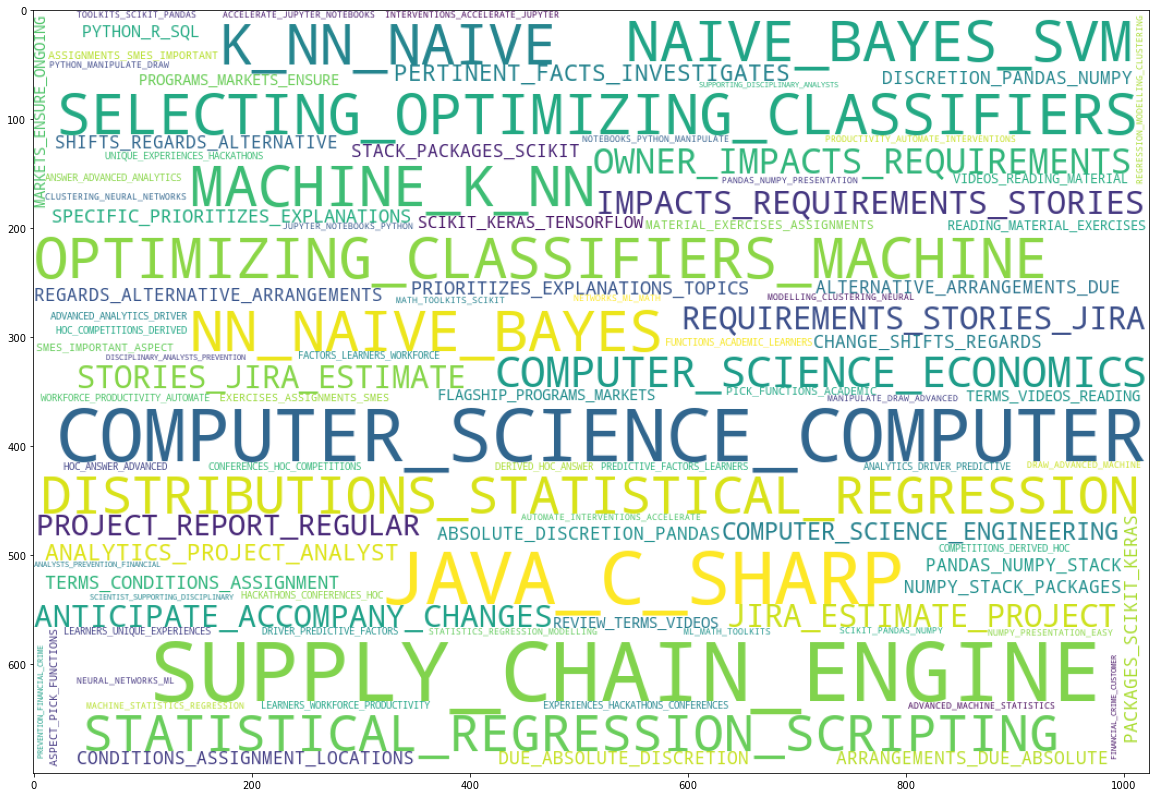

In [25]:
wordcloud = WordCloud(
    width=1024,
    height=700,
    background_color='White',
    max_words=100,
    random_state=10,
    min_word_length=2
)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud.generate_from_frequencies((trigram_wordcount)))
plt.show()

<AxesSubplot:xlabel='count', ylabel='Job Role'>

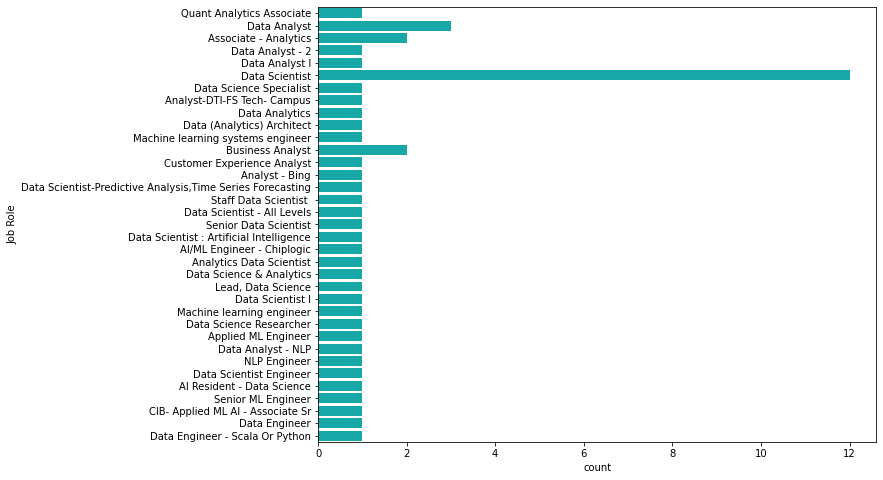

In [82]:
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y="Job Role", data=df, color="c")

<AxesSubplot:xlabel='count', ylabel='Company'>

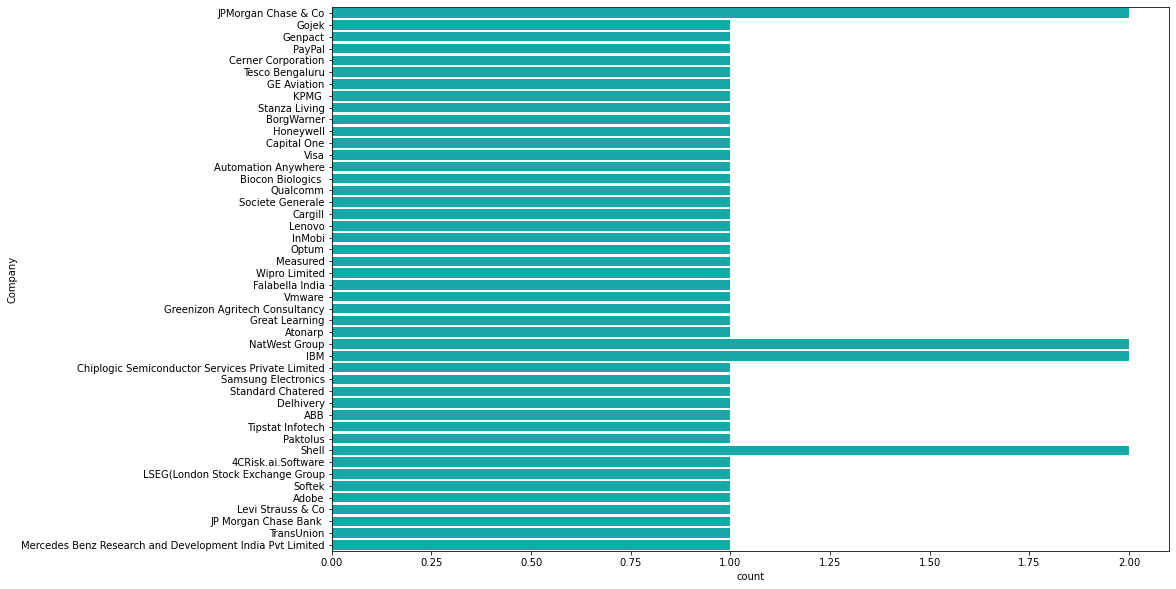

In [84]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="Company", data=df, color="c")

In [85]:
df['Job Role'].unique()

array(['Quant Analytics Associate', 'Data Analyst',
       'Associate - Analytics', 'Data Analyst - 2', 'Data Analyst I',
       'Data Scientist', 'Data Science Specialist',
       'Analyst-DTI-FS Tech- Campus', 'Data Analytics',
       'Data (Analytics) Architect', 'Machine learning systems engineer',
       'Business Analyst', 'Customer Experience Analyst',
       'Analyst - Bing',
       'Data Scientist-Predictive Analysis,Time Series Forecasting',
       'Staff Data Scientist ', 'Data Scientist - All Levels',
       'Senior Data Scientist',
       'Data Scientist : Artificial Intelligence',
       'AI/ML Engineer - Chiplogic', 'Analytics Data Scientist',
       'Data Science & Analytics', 'Lead, Data Science',
       'Data Scientist I', 'Machine learning engineer',
       'Data Science Researcher', 'Applied ML Engineer',
       'Data Analyst - NLP', 'NLP Engineer', 'Data Scientist Engineer',
       'AI Resident - Data Science', 'Senior ML Engineer',
       'CIB- Applied ML AI - Ass

In [86]:
df['Job Role'].nunique()

35

In [87]:
df['Company'].unique()

array(['JPMorgan Chase & Co', 'Gojek', 'Genpact', 'PayPal',
       'Cerner Corporation', 'Tesco Bengaluru', 'GE Aviation', 'KPMG ',
       'Stanza Living', 'BorgWarner', 'Honeywell', 'Capital One', 'Visa',
       'Automation Anywhere', 'Biocon Biologics ', 'Qualcomm',
       'Societe Generale', 'Cargill', 'Lenovo', 'InMobi', 'Optum',
       'Measured', 'Wipro Limited', 'Falabella India', 'Vmware',
       'Greenizon Agritech Consultancy', 'Great Learning', 'Atonarp',
       'NatWest Group', 'IBM',
       'Chiplogic Semiconductor Services Private Limited',
       'Samsung Electronics', 'Standard Chatered', 'Delhivery', 'ABB',
       'Tipstat Infotech', 'Paktolus', 'Shell', '4CRisk.ai.Software',
       'LSEG(London Stock Exchange Group', 'Softek', 'Adobe',
       'Levi Strauss & Co', 'JP Morgan Chase Bank ', 'TransUnion',
       'Mercedes Benz Research and Development India Pvt Limited'],
      dtype=object)

In [88]:
df['Company'].nunique()

46